In [1]:
import numpy as np
import matplotlib.pyplot as plt
from json import load as json_load, dump as json_dump

In [2]:
bfs_times = []
dfs_times = []
tile_times = []
json_overall = []

try:
    with open('ExperimentAll.json', 'rt') as fp:
        json_overall = json_load(fp)
except:
    pass

In [3]:
num = 100
prefix = 'Build/'

In [4]:
for i in range(1, num+1):
    with open(f'{prefix}Experiment{i}.json', 'rt') as fp:
        curr_json = json_load(fp)
    
    json_overall.append(curr_json)
    
    bfs_all = all(curr_json['bfsResults'])
    bfs_any = any(curr_json['bfsResults'])
    
    if bfs_all != bfs_any:
        print (f'BFS: {i}')
#         continue
    
    dfs_all = all(curr_json['dfsResults'])
    dfs_any = any(curr_json['dfsResults'])
    
    if dfs_all != dfs_any:
        print (f'DFS: {i}')
#         continue
    
    tile_all = all(curr_json['tileResults'])
    tile_any = any(curr_json['tileResults'])
    
    if tile_all != tile_any:
        print (f'Corner: {i}')
#         continue
    
#     if not bfs_all == dfs_all == tile_all:
#         continue
    
    bfs_times.append(curr_json['bfsTimes'])
    dfs_times.append(curr_json['dfsTimes'])
    tile_times.append(curr_json['tileTimes'])

BFS: 2
DFS: 2
Corner: 2
Corner: 10
Corner: 18
Corner: 23
Corner: 27
BFS: 33
DFS: 33
Corner: 34
Corner: 38
Corner: 39
Corner: 40
Corner: 41
Corner: 60
BFS: 67
DFS: 67
Corner: 83
Corner: 91


In [5]:
len(dfs_times)

100

In [6]:
len(json_overall)

200

In [7]:
# print (json_overall)

In [8]:
def plot_np(func, data, axis, title):
    axis.plot(list(range(1, len(data)+1)), [func(data[:t]) for t in range(1, 101)])
    axis.set_title(title)

def plot_mean(data, axis, title):
    plot_np(np.mean, data, axis, title)

def plot_std(data, axis, title):
    plot_np(np.std, data, axis, title)

In [9]:
def plot_all(idx):
    experiment_dfs = dfs_times[idx]
    experiment_bfs = bfs_times[idx]
    experiment_tile = tile_times[idx]
    
    fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(2, 3, sharey=True)

    plot_mean(experiment_dfs, ax1, 'DFS Mean')
    plot_std(experiment_dfs, ax4, 'DFS Standard Deviation')

    plot_mean(experiment_bfs, ax2, 'BFS Mean')
    plot_std(experiment_bfs, ax5, 'BFS Standard Deviation')

    plot_mean(experiment_tile, ax3, 'Corner Mean')
    plot_std(experiment_tile, ax6, 'Corner Standard Deviation')

    fig.set_size_inches(15, 8)

    plt.show()

In [10]:
# Plot all means
def plot_all_overlaid():
    fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(2, 3, sharey=True)

    for idx in range(len(dfs_times)):
        experiment_dfs = dfs_times[idx]
        experiment_bfs = bfs_times[idx]
        experiment_tile = tile_times[idx]
        plot_mean(experiment_dfs, ax1, 'DFS Means')
        plot_std(experiment_dfs, ax4, 'DFS Standard Deviations')

        plot_mean(experiment_bfs, ax2, 'BFS Means')
        plot_std(experiment_bfs, ax5, 'BFS Standard Deviations')

        plot_mean(experiment_tile, ax3, 'Corner Means')
        plot_std(experiment_tile, ax6, 'Corner Standard Deviations')

    fig.set_size_inches(15, 8)

    plt.show()

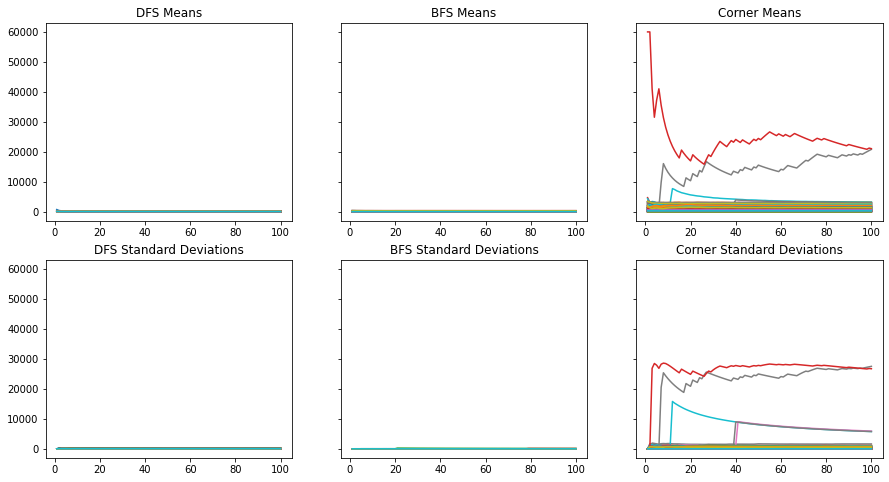

In [11]:
plot_all_overlaid()

In [12]:
with open('ExperimentAll.json', 'wt') as fp:
    json_dump(json_overall, fp)